# Retail Transaction Dataset

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-transaction-dataset/Retail_Transaction_Dataset.csv


In [54]:
# Reading Dataset
file_path = "/kaggle/input/retail-transaction-dataset/Retail_Transaction_Dataset.csv"
df = pd.read_csv(file_path)

In [55]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


**Adding Missing Values**

In [57]:
# Function to add missing data artificially for testing purposes
def add_missing_data(df, missing_rate):
    np.random.seed(42)
    missing_data = df.copy()
    n_missing = int(np.floor(missing_rate * df.size))
    missing_indices = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    random_missing = np.random.choice(len(missing_indices), n_missing, replace=False)
    for idx in random_missing:
        row, col = missing_indices[idx]
        missing_data.iat[row, col] = np.nan
    return missing_data

In [81]:
# Adding Missing Data to the Dataset
df_with_missing = add_missing_data(df, missing_rate=0.02)

In [59]:
print("\nGeneral information about the dataset:")
print(df_with_missing.info())


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          97958 non-null  float64
 1   ProductID           97981 non-null  object 
 2   Quantity            98033 non-null  float64
 3   Price               97967 non-null  float64
 4   TransactionDate     97987 non-null  object 
 5   PaymentMethod       98003 non-null  object 
 6   StoreLocation       98046 non-null  object 
 7   ProductCategory     98041 non-null  object 
 8   DiscountApplied(%)  97980 non-null  float64
 9   TotalAmount         98004 non-null  float64
dtypes: float64(5), object(5)
memory usage: 7.6+ MB
None


In [60]:
df_with_missing.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318.0,C,7.0,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229.0,C,4.0,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675.0,A,8.0,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826.0,NaN,5.0,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413.0,A,7.0,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [61]:
print("\nCount of Missing Values:")
print(df_with_missing.isnull().sum())


Count of Missing Values:
CustomerID            2042
ProductID             2019
Quantity              1967
Price                 2033
TransactionDate       2013
PaymentMethod         1997
StoreLocation         1954
ProductCategory       1959
DiscountApplied(%)    2020
TotalAmount           1996
dtype: int64


In [62]:
print("Missing Value Percentage:")
print(df_with_missing.isnull().mean() * 100)

Missing Value Percentage:
CustomerID            2.042
ProductID             2.019
Quantity              1.967
Price                 2.033
TransactionDate       2.013
PaymentMethod         1.997
StoreLocation         1.954
ProductCategory       1.959
DiscountApplied(%)    2.020
TotalAmount           1.996
dtype: float64


# Exploratory Data Analysis (EDA)

In [63]:
print("\nSummary Statistics:")
print(df_with_missing.describe())


Summary Statistics:
          CustomerID      Quantity         Price  DiscountApplied(%)  \
count   97958.000000  98033.000000  97967.000000        97980.000000   
mean   500629.398855      5.008834     55.065934           10.021883   
std    288405.075574      2.580178     25.970613            5.777468   
min        14.000000      1.000000     10.000430            0.000046   
25%    251155.250000      3.000000     32.561450            5.014109   
50%    499911.500000      5.000000     55.108855           10.033288   
75%    751089.250000      7.000000     77.453142           15.015528   
max    999997.000000      9.000000     99.999284           19.999585   

        TotalAmount  
count  98004.000000  
mean     248.311931  
std      184.541221  
min        8.274825  
25%       95.161396  
50%      200.285473  
75%      361.966978  
max      896.141242  


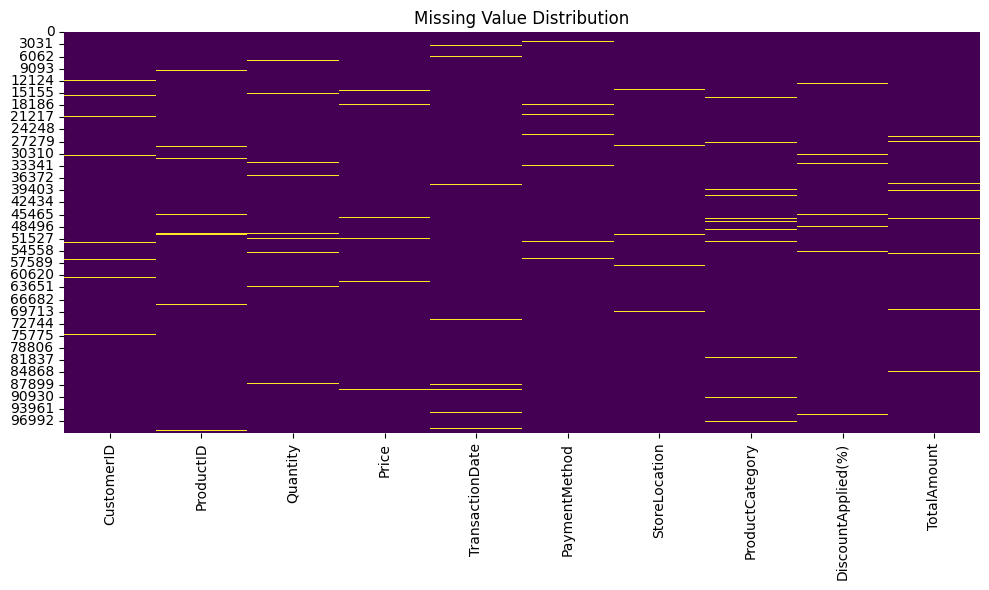

In [82]:
# Visualization 1: Distribution of Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Distribution')
plt.tight_layout()
plt.show()

In [83]:
# Separating categorical and numerical columns
categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

In [84]:
# Exclude 'CustomerID' from numerical columns for analysis
numerical_cols = df_with_missing.select_dtypes(include=['float64', 'int64']).columns.drop("CustomerID")

In [85]:
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['ProductID', 'TransactionDate', 'PaymentMethod', 'StoreLocation',
       'ProductCategory'],
      dtype='object')
Numerical Columns: Index(['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount'], dtype='object')


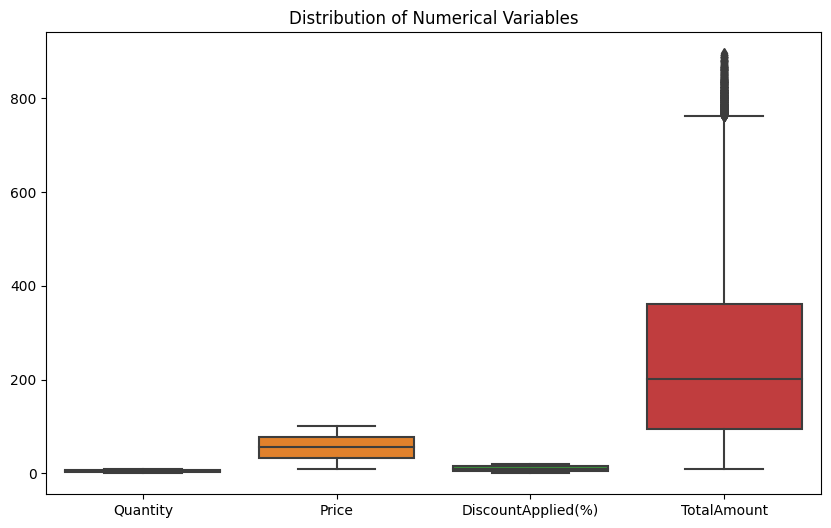

In [68]:
# Visualization 2: Boxplot for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_missing[numerical_cols])
plt.title("Distribution of Numerical Variables")
plt.show()

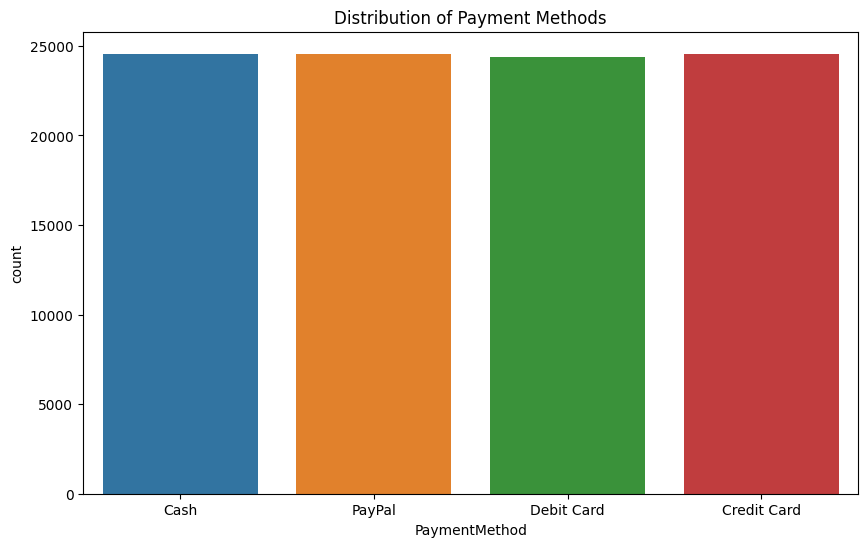

In [69]:
# Visualization 3: Countplot for payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x="PaymentMethod", data=df_with_missing)
plt.title("Distribution of Payment Methods")
plt.show()

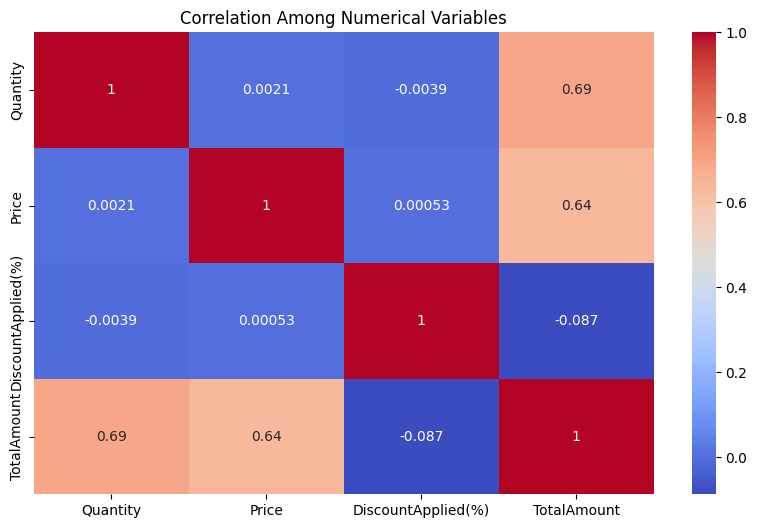

In [70]:
# Visualization 4: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Among Numerical Variables")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


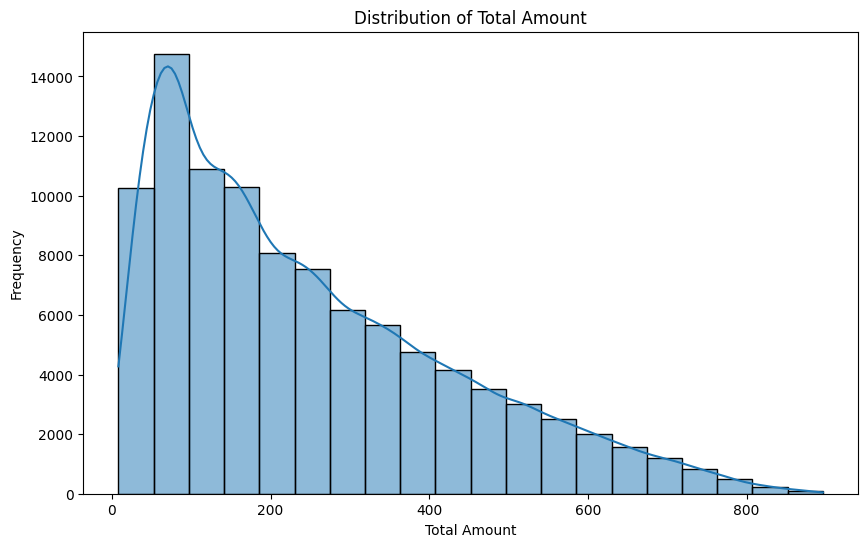

In [71]:
# Visualization 5: Histogram for TotalAmount
plt.figure(figsize=(10, 6))
sns.histplot(df_with_missing["TotalAmount"], bins=20, kde=True)
plt.title("Distribution of Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_30/503809690.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="ProductCategory", y="TotalAmount", data=df_with_missing, estimator=np.sum, ci=None)


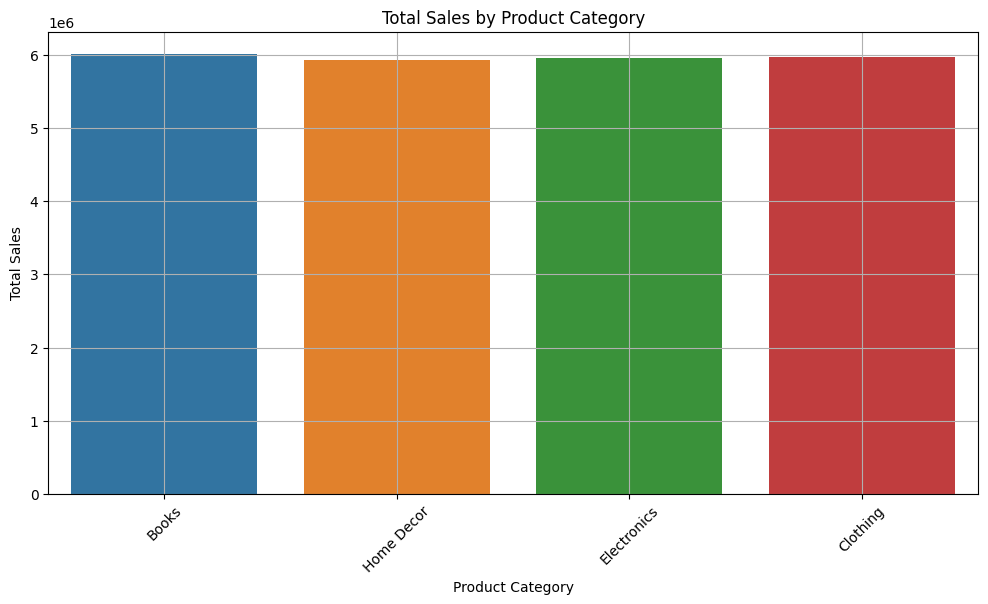

In [72]:
# Visualization 6: Barplot for TotalAmount by ProductCategory
plt.figure(figsize=(12, 6))
sns.barplot(x="ProductCategory", y="TotalAmount", data=df_with_missing, estimator=np.sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Data Cleaning: Handling Missing Values**

In [73]:
# Imputing numerical columns with median
imputer = SimpleImputer(strategy="median")
df_with_missing[numerical_cols] = imputer.fit_transform(df_with_missing[numerical_cols])

In [74]:
# Imputing categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy="most_frequent")
df_with_missing[categorical_cols] = imputer_cat.fit_transform(df_with_missing[categorical_cols])

In [75]:
print("\nMissing Values After Imputation:")
print(df_with_missing.isnull().sum())


Missing Values After Imputation:
CustomerID            2042
ProductID                0
Quantity                 0
Price                    0
TransactionDate          0
PaymentMethod            0
StoreLocation            0
ProductCategory          0
DiscountApplied(%)       0
TotalAmount              0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


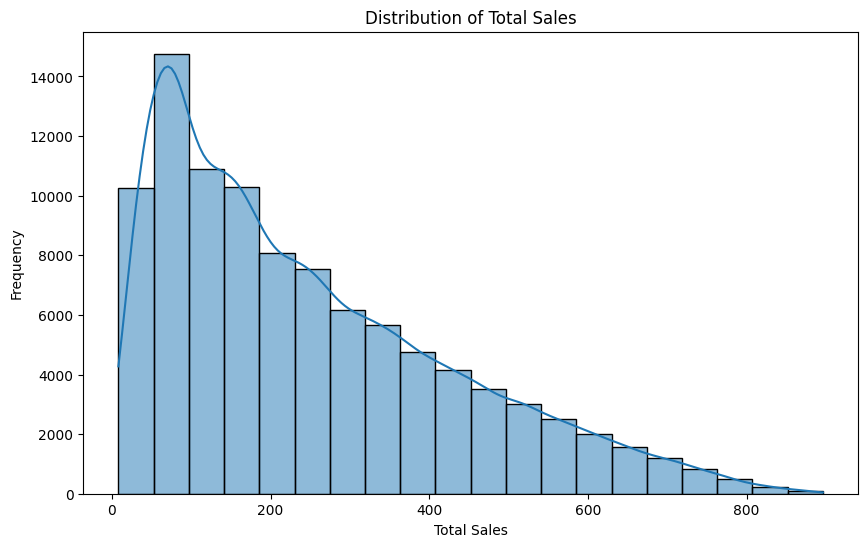

In [86]:
# Visualization: Distribution of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_with_missing["TotalAmount"], bins=20, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_30/4267952334.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="ProductCategory", y="TotalAmount", data=df_with_missing, estimator=np.sum, ci=None)


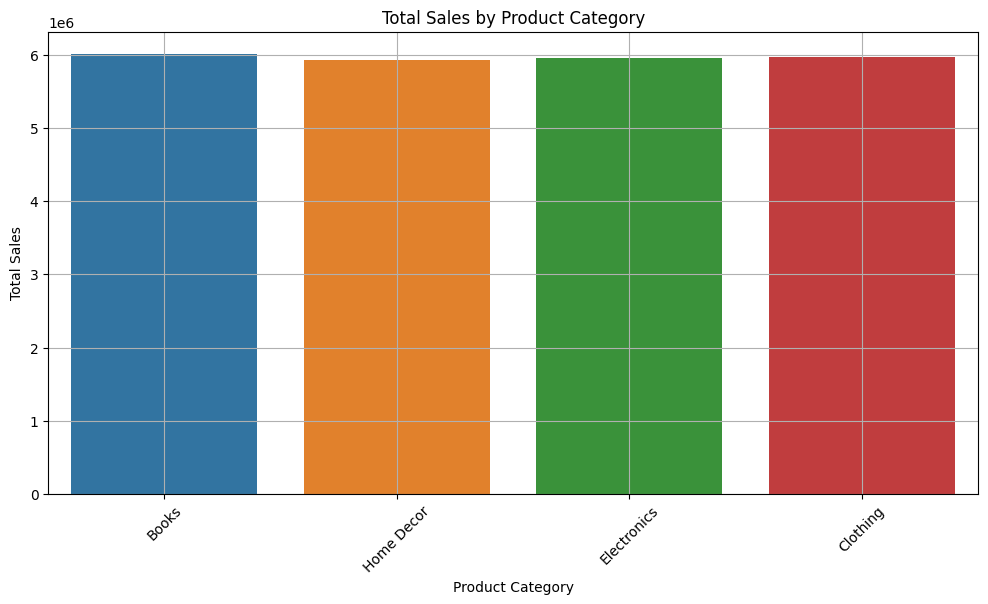

In [88]:
# Total Sales by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x="ProductCategory", y="TotalAmount", data=df_with_missing, estimator=np.sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Preparing Data for Machine Learning

In [78]:
# Selecting features and target variable
X = df_with_missing[["Quantity", "Price", "DiscountApplied(%)"]]
y = df_with_missing["TotalAmount"]

In [79]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)